In [3]:
import numpy as np
import pandas as pd
from DALNModel import Model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer
from sklearn.metrics import accuracy_score
import cv2
from DALNtrain import train
from DisplayLogs import display_logs
import random
random.seed(102)


In [2]:

#define a function to standardize the image and resize it
def ppandresize(X, n_h, n_w):
    """
    :param X: image array of size nxhxwxc
    :param n_h: the required new height
    :param n_w: the required new width
    :return: image array of size nxn_h,n_wxc
    """
    new_size=(n_h,n_w)
    if X.dtype is np.uint8:
        X=X/255
    if X.dtype is np.float64:
        print('it is float 64')
        X=(X + 1) / 2.0  # Convert to the range [0, 1]
        # Optionally, ensure the values are clipped to [0, 1]
        X = np.clip(X, 0, 1)
    
    X_resized=np.zeros((X.shape[0], *new_size))
    for i in range(X.shape[0]):
        X_resized[i]=cv2.resize(X[i], new_size)
    return X_resized

#define a function to convert grayscale image to image with 3 channels
def graytoRGB(X):
    """
    :param X: grayscale image of size nxhxwx1
    :return: grayscale image of size nxhxwx3
    """
    X=np.stack((X,)*3, axis=-1)
    return X

In [3]:
# import mnist dataset and preprocess it as source data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, y_train= X_train[0:60000], y_train[0:60000]
X_test, y_test= X_test[0:500], y_test[0:500]
X_train, X_test= X_train/255, X_test/255
X_train=ppandresize(X_train,32,32) 
X_train=graytoRGB(X_train) 

X_test=ppandresize(X_test,32,32)
X_test=graytoRGB(X_test)

In [4]:
#import usps data as target data
from extra_keras_datasets import usps
(X_t, y_t), (_, _)=usps.load_data()
X_t=ppandresize(X_t,32,32)
X_t=graytoRGB(X_t)
X_t=(X_t+1)/2
for i in range(4):
    X_t=np.concatenate([X_t, X_t], axis=0)
    y_t=np.concatenate([y_t, y_t], axis=0)
X_t, y_t= X_t[0:60000], y_t[0:60000]


INFO:root:Loading dataset = usps


In [4]:
modelDA=Model()


In [5]:
dir(modelDA)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fe_optimizer',
 'feature_extractor',
 'label_predictor',
 'lp_optimizer',
 'predict_label',
 'train_source_only',
 'train_step']

In [17]:
trainer_DA=train(X_source=X_train, y_source= y_train, model=modelDA, batch_size=64, X_target=X_t, y_target= y_t, epochs=5, source_only=False)


Epoch 1 Loss: 0.14386644959449768
For epoch 1: {'accuracy_score_source': 0.962, 'accuracy_score_target': 0.8106}
Epoch 2 Loss: 0.036170609295368195
For epoch 2: {'accuracy_score_source': 0.9436, 'accuracy_score_target': 0.8329}
Epoch 3 Loss: 0.016363458707928658
For epoch 3: {'accuracy_score_source': 0.9427, 'accuracy_score_target': 0.836}
Epoch 4 Loss: 0.008842898532748222
For epoch 4: {'accuracy_score_source': 0.935, 'accuracy_score_target': 0.8273}
Epoch 5 Loss: 0.005295584909617901
For epoch 5: {'accuracy_score_source': 0.9338, 'accuracy_score_target': 0.837}


In [5]:
modelnotDA1=Model()

In [6]:
trainernotDA= train(X_source=X_train, y_source= y_train, model=modelnotDA1, X_target= X_t, y_target= y_t, batch_size=64, epochs=5, source_only=True)


Epoch 1 Loss: 0.1548268347978592
For epoch 1: {'accuracy_score_source': 0.9877, 'accuracy_score_target': 0.3116}
Epoch 2 Loss: 0.04312209039926529
For epoch 2: {'accuracy_score_source': 0.9901, 'accuracy_score_target': 0.4325}
Epoch 3 Loss: 0.01980971358716488
For epoch 3: {'accuracy_score_source': 0.9917, 'accuracy_score_target': 0.4774}
Epoch 4 Loss: 0.009243444539606571
For epoch 4: {'accuracy_score_source': 0.9931, 'accuracy_score_target': 0.4106}
Epoch 5 Loss: 0.004664373584091663
For epoch 5: {'accuracy_score_source': 0.9934, 'accuracy_score_target': 0.4243}


In [34]:
model3=Model()

In [35]:
trainer3= train(X_source=X_train, y_source= y_train, model=model3, batch_size=64, epochs=5, source_only=True)

Epoch 1 Loss: 0.15124408900737762
For epoch 1: {'accuracy_score_source': 0.9854}
Epoch 2 Loss: 0.0414082333445549
For epoch 2: {'accuracy_score_source': 0.989}
Epoch 3 Loss: 0.01848480850458145
For epoch 3: {'accuracy_score_source': 0.9926}
Epoch 4 Loss: 0.008869227021932602
For epoch 4: {'accuracy_score_source': 0.9947}
Epoch 5 Loss: 0.004566794261336327
For epoch 5: {'accuracy_score_source': 0.9938}


In [36]:
model4=Model()

In [37]:
trainer4= train(X_source=X_train, y_source= y_train, X_target=X_t, model=model4, batch_size=64, epochs=5, source_only=False)

Epoch 1 Loss: 0.14350029826164246
For epoch 1: {'accuracy_score_source': 0.954}
Epoch 2 Loss: 0.03553582727909088
For epoch 2: {'accuracy_score_source': 0.9626}
Epoch 3 Loss: 0.015833698213100433
For epoch 3: {'accuracy_score_source': 0.9619}
Epoch 4 Loss: 0.008189047686755657
For epoch 4: {'accuracy_score_source': 0.951}
Epoch 5 Loss: 0.0048219067975878716
For epoch 5: {'accuracy_score_source': 0.948}


In [38]:
logs=display_logs(X_train, y_train, X_t, y_t, model=modelDA)

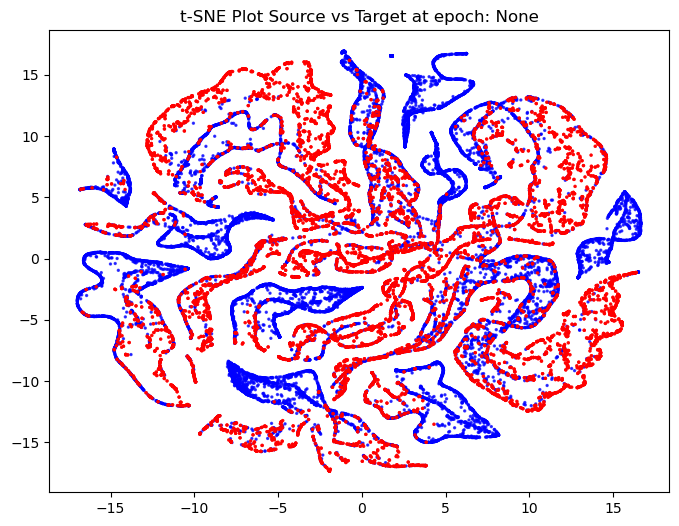

In [39]:
logs.plot_tsne()

In [40]:
logs2=display_logs(X_train, y_train, X_t, y_t, model=modelnotDA)

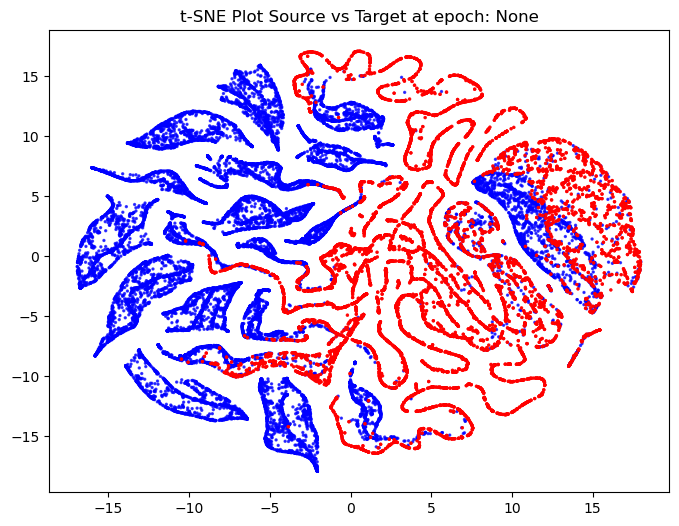

In [41]:
logs2.plot_tsne()